<h2>1.IMPORTING THE REQUIRED PACKAGES</h2>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

<h2>2.Loading the dataset.</h2>

In [2]:
churn=pd.read_csv("E:/Churn_Modelling.csv")

In [3]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<h2>3.Data Visualizations.</h2>

<h3>Univariate Analysis</h3>

<AxesSubplot:>

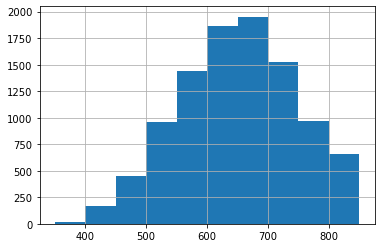

In [4]:
churn.CreditScore.hist()

<AxesSubplot:xlabel='Geography', ylabel='count'>

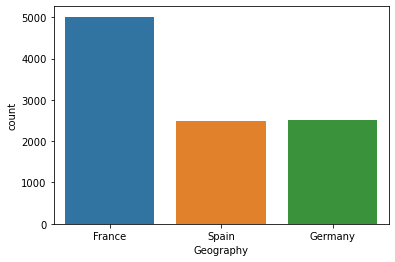

In [5]:
sns.countplot(x="Geography",data=churn)

<AxesSubplot:xlabel='Gender', ylabel='count'>

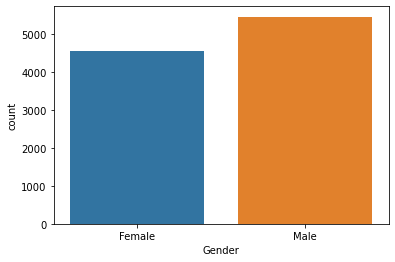

In [6]:
sns.countplot(x="Gender",data=churn)

<AxesSubplot:>

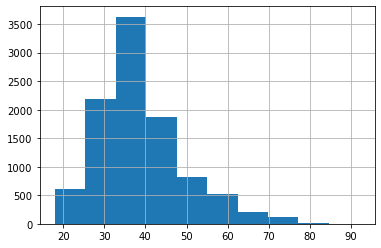

In [7]:
churn.Age.hist()

<AxesSubplot:xlabel='Tenure', ylabel='count'>

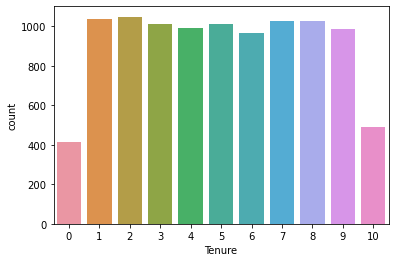

In [8]:
sns.countplot(x="Tenure",data=churn)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

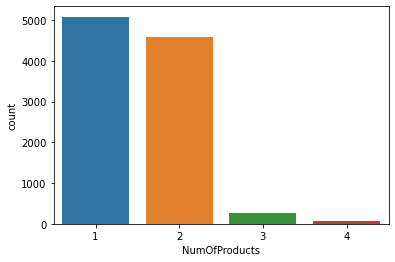

In [9]:
sns.countplot(x="NumOfProducts",data=churn)

<AxesSubplot:>

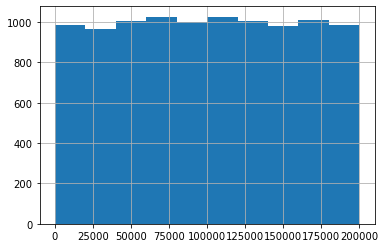

In [10]:
churn.EstimatedSalary.hist()

<h3>Bivariate Analysis</h3>

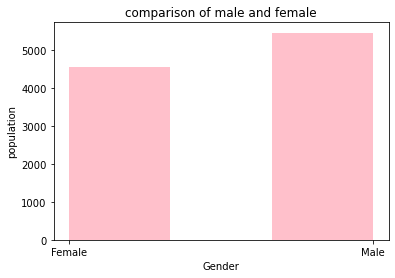

In [11]:
plt.hist(x = churn.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()


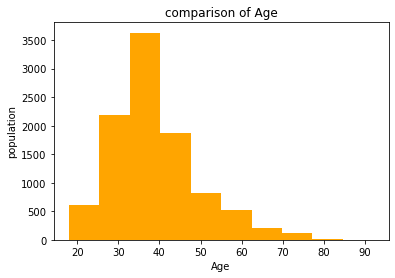

In [12]:
plt.hist(x = churn.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

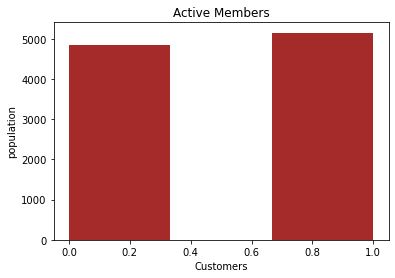

In [13]:
plt.hist(x = churn.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()


<h2>4.Performing descriptive statistics</h2>

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
churn.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [16]:
churn.Geography.describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [17]:
churn.Gender.describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

In [18]:
churn.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [19]:
churn.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [20]:
churn.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<h2>5. Missing values</h2>

In [21]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h2> 6.Outliers</h2>

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6e4427340>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6e44279a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6e4427070>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6e4427e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6e4439190>],
 'means': []}

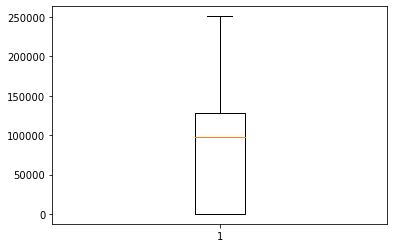

In [22]:
plt.boxplot(churn.Balance)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6e4491670>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6e4491c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6e4491370>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6e449b1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6e449b4c0>],
 'means': []}

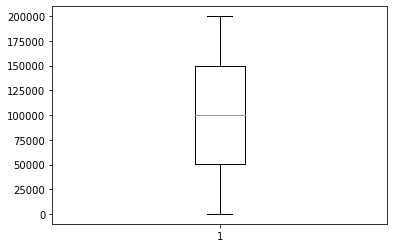

In [23]:
plt.boxplot(churn.EstimatedSalary)

<h2>7.perform encoding.</h2>

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
churn['Geography']= label_encoder.fit_transform(churn['Geography'])
churn['Gender']= label_encoder.fit_transform(churn['Gender'])

<h2>8.Split the data into dependent and independent variables.</h2>

In [25]:
churn = churn.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

In [26]:
y=churn.Exited
churn.drop(['Exited'], axis = 1,inplace=True)
x=churn

<h2>9.Scaling the independent variables</h2>

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x)
scaled_data=scaler.transform(x)

In [28]:
x= pd.DataFrame(scaled_data)

<h2>10.Splitting the data into training ,testing</h2>

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =42)  

In [30]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9
9254,0.672,0.0,1.0,0.189189,0.6,0.000000,0.333333,1.0,1.0,0.895494
1561,0.564,0.5,1.0,0.324324,0.4,0.476786,0.333333,1.0,1.0,0.979930
1670,0.418,1.0,1.0,0.081081,0.3,0.457317,0.000000,1.0,0.0,0.429438
6087,0.422,0.0,0.0,0.121622,0.9,0.540606,0.000000,1.0,0.0,0.765417
6669,0.334,0.0,1.0,0.513514,0.9,0.566554,0.000000,0.0,0.0,0.197401


In [31]:
y_train.head(5)

9254    0
1561    0
1670    1
6087    1
6669    1
Name: Exited, dtype: int64

In [32]:
x_test.head(5)

,0,1,2,3,4,5,6,7,8,9
6252,0.492,0.5,1.0,0.189189,0.3,0.385452,0.333333,0.0,0.0,0.208904
4684,0.546,0.0,1.0,0.337838,0.1,0.000000,0.333333,1.0,1.0,0.731908
1731,0.502,1.0,0.0,0.351351,0.4,0.000000,0.333333,1.0,0.0,0.292777
4742,0.312,0.5,1.0,0.554054,0.8,0.474902,0.333333,1.0,1.0,0.853422
4521,0.420,1.0,0.0,0.121622,0.7,0.498194,0.000000,1.0,1.0,0.573346


In [33]:
y_test.head(5)

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64